<a href="https://colab.research.google.com/github/chavila1/comphw/blob/main/computationalhomework10CORRECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical Mechanics I (PHYS 311)
## Studio 12

*Name:* Carolyn Haviland

*Date:* 11/04/2025

## Driven Damped Harmonic Oscillators

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Last time you coded up a damped harmonic oscillator system. Let's simplify down to 1D, and now add a driving force.

Code up the differential equation for a 1D harmonic oscillator using `odeint` like we've done a few times in this class. But now include a frictional term **and a driving force $f(t)=f_0 cos(\omega_d t)$**. So your system of first-order ODEs should be:

$$\dot{v}_x = - 2\beta v_x - \omega_0^2 x + f_0 cos(\omega_d t)$$
$$\dot{x} = v_x$$

When you code this up, make $\beta$, $\omega_0$, $\omega_d$, and $f_0$ configurable arguments to your `ode_system` function (the same way we were handing it masses before).

In [2]:
def ode_system(inputs, t, m):
  inputs = [x,y,xdot,ydot]

  r = np.hypot(x,y) # This is a handy function that computes sqrt(x^2+y^2) for you
  phi = np.arctan2(y,x) # And this calculates the polar angle of our vector

 # Fr = -1/(r*r)
 # Fx = Fr*np.cos(phi)
 # Fy = Fr*np.sin(phi)

# Fx/m and Fy/m
  ax = -2*beta*xdot - x*omega0**2 + f0*np.cos(omegad*t)
  ay = -2*beta*ydot - y*omega0**2 + f0*np.cos(omegad*t)

  return[xdot, ydot, ax, ay]

t = linspace(0, 100, 200)
beta = 1
omega0 = 1
omegad = 1
f0 = 1

Let's **not** use animations this week **(so you don't need any `plotSomeStuff` function around!)**. Let's just plot the positions as a function of time. Basically, we're making the plots that I tried to (badly) draw on the board.

Plot for times from 0 to 50, in 200 steps.
Let's use $\beta=0.1$, $\omega_0=10$ (i.e. underdamped!).
To describe the driving force, use $f_0=1$, $\omega_d=1$ (below the resonance condition).
Start the system at the equilibrium position $x=0$ with no initial velocity.

**Comment on the result:** Do you see transients? Do you see a steady state behavior? What's the frequency and amplitude of the steady-state behavior? Roughly how long does it take to get to the steady state?


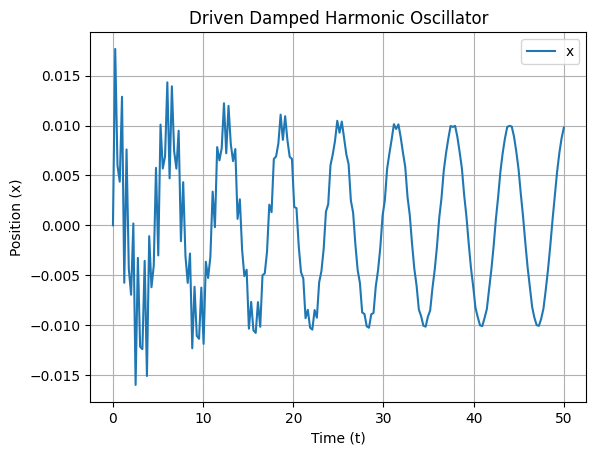

In [3]:
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

t = linspace(0, 50, 200)

def ode_system(inputs, t, beta, omega0, omegad, f0):
  x, xdot = inputs

  ax = -2*beta*xdot - x*omega0**2 + f0*np.cos(omegad*t)

  return[xdot, ax]

beta = 0.1
omega0 = 10
omegad = 1
f0 = 1

# x, xdot
initial_conditions = [0, 0]

solutions = odeint(ode_system, initial_conditions, t, args=(beta, omega0, omegad, f0))

# Arrays
x = solutions[:,0]

plot(t, x, label='x')
xlabel('Time (t)')
ylabel('Position (x)')
title('Driven Damped Harmonic Oscillator')
grid(True)
legend()



# The steady state behavior is visible after about 20 seconds but fully realized at 35 seconds. The amplitude is about 0.01 with a frequency
# of 0.167 Hz (1/T where T is 6 seconds).

Change the starting position to 0.05, with no initial velocity. How long does it take to get to the steady state? Try with starting position of 1.

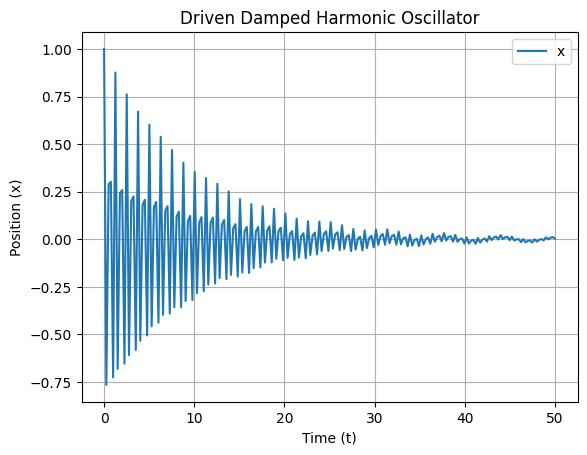

In [4]:
beta = 0.1
omega0 = 10
omegad = 1
f0 = 1

# x, xdot
initial_conditions = [1, 0]

solutions = odeint(ode_system, initial_conditions, t, args=(beta, omega0, omegad, f0))

# Arrays
x = solutions[:,0]

plot(t, x, label='x')
xlabel('Time (t)')
ylabel('Position (x)')
title('Driven Damped Harmonic Oscillator')
grid(True)
legend()

# With an initial position of 0.05 the system takes about 48 seconds to reach a steady state.
# At an initial of 1 it seems to reach a steady state at around 40 seconds but probably needs more time to see a true steady state.

Now play with the parameters of the driving force. Demonstrate that you get the largest resulting amplitude when you drive an oscillator near its natural frequency by scanning various values of the driving frequencies.

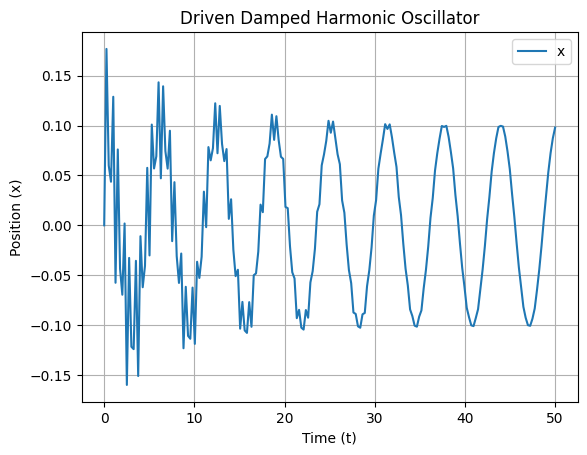

In [11]:
beta = 0.1
omega0 = 10
omegad = 1
f0 = 10

# x, xdot
initial_conditions = [0, 0]

solutions = odeint(ode_system, initial_conditions, t, args=(beta, omega0, omegad, f0))

# Arrays
x = solutions[:,0]

plot(t, x, label='x')
xlabel('Time (t)')
ylabel('Position (x)')
title('Driven Damped Harmonic Oscillator')
grid(True)
legend()

Plot the original driving force on some plots to compare the phase of the resulting motion. Show that well below resonance, the relative phase is 0, and well above it, the relative phase is $\pi$

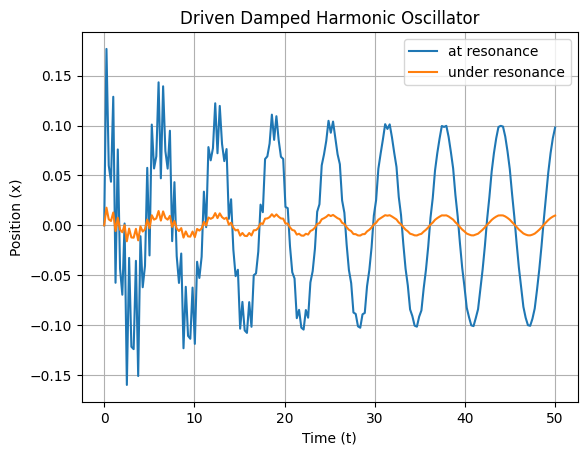

In [9]:
beta = 0.1
omega0 = 10
omegad = 1
f0 = 10

# x, xdot
initial_conditions = [0, 0]

solutions = odeint(ode_system, initial_conditions, t, args=(beta, omega0, omegad, f0))

# Arrays
x = solutions[:,0]

plot(t, x, label='at resonance')
xlabel('Time (t)')
ylabel('Position (x)')
title('Driven Damped Harmonic Oscillator')
grid(True)
legend()

beta2 = 0.1
omega02 = 10
omegad2 = 1
f02 = 1

# x, xdot
initial_conditions = [0, 0]

solutions = odeint(ode_system, initial_conditions, t, args=(beta2, omega02, omegad2, f02))

# Arrays
x2 = solutions[:,0]

plot(t, x2, label='under resonance')
xlabel('Time (t)')
ylabel('Position (x)')
title('Driven Damped Harmonic Oscillator')
grid(True)
legend()

#print(x)
#print(x2)

# There is a little motion seen in the orange function (f0 = 1) but overwhelmingly the function resolves around 0 with less to drive the oscillations.
# When f0 = 10 the function continues to behave more periodically.

**EC(+0.5): Figure out a way to calculate the phase offset between the steady-state behavior and the driving force. This will be a little tricky given the transients. Then plot the phase offset as a function of the driving frequency for a given oscillator. Show that when you have a nonzero damping, you get a smooth "turn-on" curve for the transition from $\delta=0$ to $\pi$**